In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("features.csv")

### Training random forest regressor

In [3]:
from sklearn.model_selection import train_test_split

features = [
    "size",
    "number_of_classes",
    "number_of_literals",
    "number_of_entities",
    "number_of_properties",
    "number_of_connections",
    "number_of_connected_vertices",
    "average_literals_per_vertex",
]
target = "relevance"

train_data, test_data, train_labels, test_labels = train_test_split(
    df[features], df[target], test_size=0.2, random_state=42
)

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Train the random forest regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [5]:
max_estimators = 41

In [6]:
# Lists to store training and testing MSE values
train_mse = []
test_mse = []

# Train the model and collect MSE at each step
for i in range(1, max_estimators):
    model.n_estimators = i
    model.fit(train_data, train_labels)
    
    y_train_pred = model.predict(train_data)
    y_test_pred = model.predict(test_data)
    
    train_mse.append(mean_squared_error(train_labels, y_train_pred))
    test_mse.append(mean_squared_error(test_labels, y_test_pred))

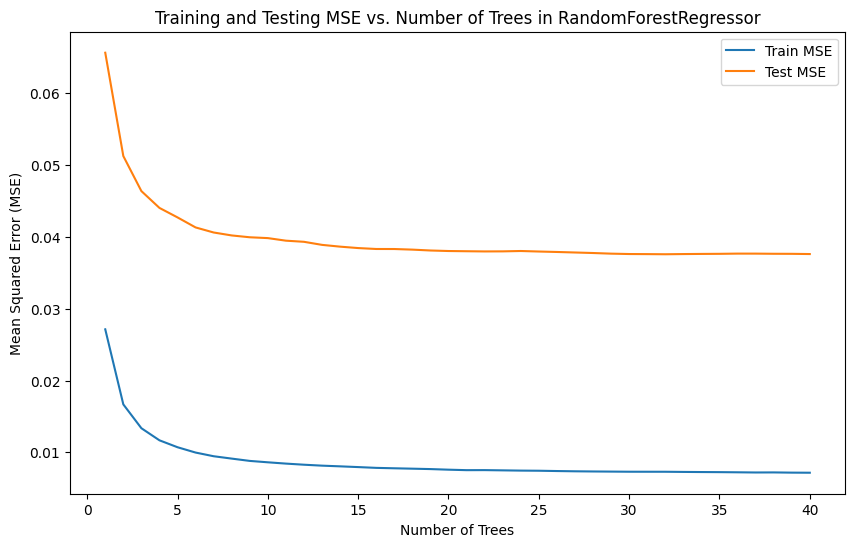

In [7]:
# Plot the training and testing MSE
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_estimators), train_mse, label='Train MSE')
plt.plot(range(1, max_estimators), test_mse, label='Test MSE')
plt.xlabel('Number of Trees')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training and Testing MSE vs. Number of Trees in RandomForestRegressor')
plt.legend()
plt.show()

In [8]:
# Make predictions on the test set
predictions = model.predict(test_data)

# Evaluate the model's performance
mse = mean_squared_error(test_labels, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.03761269890659662


### Explain

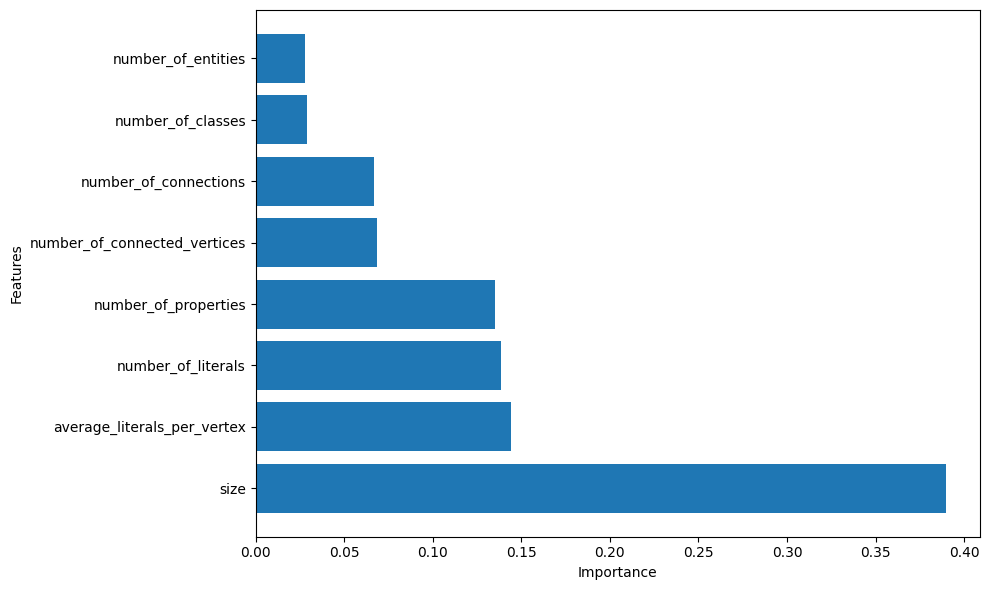

In [10]:
# Get feature importance from the trained model
importance = model.feature_importances_

# Get the names of the features
feature_names = train_data.columns

# Sort feature importance in descending order
sorted_indices = importance.argsort()[::-1]
sorted_importance = importance[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Create a horizontal bar plot of feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(importance)), sorted_importance, tick_label=sorted_feature_names)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


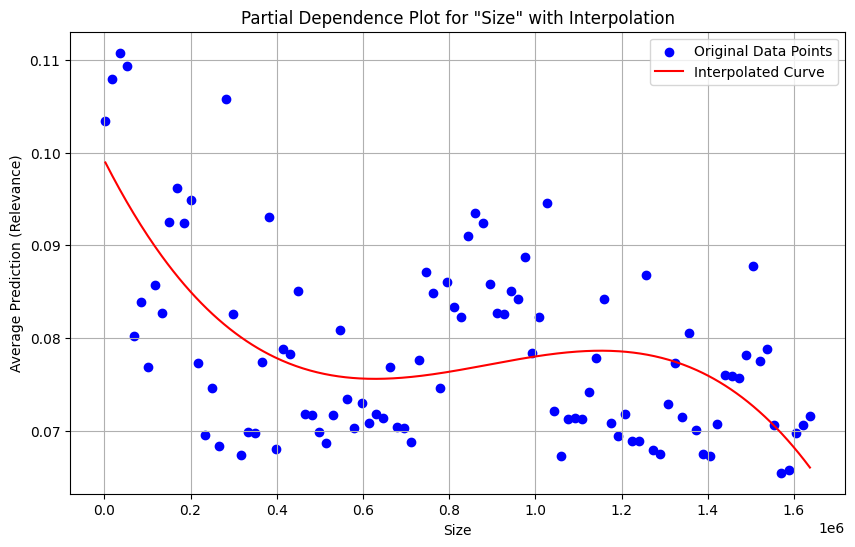

In [26]:
from sklearn.inspection import partial_dependence
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt
import numpy as np

# Calculate partial dependence
result = partial_dependence(model, train_data, features=['size'])
feature_values = result['values'][0]
average_predictions = result['average'][0]

# Perform spline interpolation
spline = UnivariateSpline(feature_values, average_predictions)
smoothed_feature_values = np.linspace(min(feature_values), max(feature_values), 500)
smoothed_predictions = spline(smoothed_feature_values)

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(feature_values, average_predictions, label='Original Data Points', c='blue')
plt.plot(smoothed_feature_values, smoothed_predictions, label='Interpolated Curve', c='red')
plt.xlabel('Size')
plt.ylabel('Average Prediction (Relevance)')
plt.legend()
plt.grid(True)
plt.show()


### Save the model

In [ ]:
import pickle

# Save the model to a file
with open('random_forest_regressor_model.pkl', 'wb') as file:
    pickle.dump(model, file)